In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
covid = pd.read_csv("covid19.csv", low_memory=False)

In [18]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-10-12 04:22:51,33.93911,67.709953,200626.0,7807.0,NaN,NaN,Afghanistan,515.372592,3.891320
1,NaN,NaN,NaN,Albania,2022-10-12 04:22:51,41.15330,20.168300,332534.0,3590.0,NaN,NaN,Albania,11555.146292,1.079589
2,NaN,NaN,NaN,Algeria,2022-10-12 04:22:51,28.03390,1.659600,270716.0,6881.0,NaN,NaN,Algeria,617.353617,2.541778
3,NaN,NaN,NaN,Andorra,2022-10-12 04:22:51,42.50630,1.521800,46275.0,155.0,NaN,NaN,Andorra,59891.283246,0.334954
4,NaN,NaN,NaN,Angola,2022-10-12 04:22:51,-11.20270,17.873900,103131.0,1917.0,NaN,NaN,Angola,313.789810,1.858801


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3839 non-null   object 
 1   Admin2               0 non-null      float64
 2   Province_State       0 non-null      float64
 3   Country_Region       177 non-null    object 
 4   Last_Update          177 non-null    object 
 5   Lat                  175 non-null    float64
 6   Long_                175 non-null    float64
 7   Confirmed            177 non-null    float64
 8   Deaths               177 non-null    float64
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         177 non-null    object 
 12  Incident_Rate        172 non-null    float64
 13  Case_Fatality_Ratio  177 non-null    float64
dtypes: float64(10), object(4)
memory usage: 439.4+ KB


In [19]:
data = covid.drop([
    'Province_State',
    'Admin2',
    'FIPS',
    'Recovered',
    'Active',
    'Combined_Key',
    'Lat',
    'Long_'
], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       177 non-null    object 
 1   Last_Update          177 non-null    object 
 2   Confirmed            177 non-null    float64
 3   Deaths               177 non-null    float64
 4   Incident_Rate        172 non-null    float64
 5   Case_Fatality_Ratio  177 non-null    float64
dtypes: float64(4), object(2)
memory usage: 188.4+ KB


In [20]:
data.head()

,Country_Region,Last_Update,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,2022-10-12 04:22:51,200626.0,7807.0,515.372592,3.891320
1,Albania,2022-10-12 04:22:51,332534.0,3590.0,11555.146292,1.079589
2,Algeria,2022-10-12 04:22:51,270716.0,6881.0,617.353617,2.541778
3,Andorra,2022-10-12 04:22:51,46275.0,155.0,59891.283246,0.334954
4,Angola,2022-10-12 04:22:51,103131.0,1917.0,313.789810,1.858801


In [21]:
#eksik verileri bulma
data.isna().sum().sort_values(ascending=False)

Incident_Rate          3844
Country_Region         3839
Last_Update            3839
Confirmed              3839
Deaths                 3839
Case_Fatality_Ratio    3839
dtype: int64

In [22]:
# Fonksiyon: İstatistiksel özet çıkar
#Sadece sayısal sütunları (int64, float64) alıyor.
#describe() ile temel istatistikleri hesaplıyor.
#Ek olarak medyan (median), eksik değer sayısı (missing_value) ve eksik değer oranını (missing_value_rate) ekliyor.
def sum_num(df, name="Veri Seti"):
    num_df = df.select_dtypes(include=["int64", "float64"])
    summary = num_df.describe().T
    summary["median"] = num_df.median()
    summary["missing_value"]= num_df.isnull().sum()
    summary["missing_value_rate"]=num_df.isnull().mean()*100
    summary = summary[["mean", "median", "std", "min", "25%", "50%", "75%", "max","missing_value","missing_value_rate"]]
    print(f"\n--- {name} için istatistiksel özet ---\n")
    print(summary)

# data set özeti
sum_num(data, "data.csv")


--- data.csv için istatistiksel özet ---

                             mean         median           std        min  \
Confirmed            1.219467e+06  206250.000000  3.335249e+06   9.000000   
Deaths               1.177063e+04    2158.000000  2.678377e+04   0.000000   
Incident_Rate        1.502769e+04    8085.478274  1.754114e+04  38.894293   
Case_Fatality_Ratio  1.520850e+00       1.073566  2.308684e+00   0.000000   

                              25%            50%           75%           max  \
Confirmed            27782.000000  206250.000000  1.006070e+06  3.498687e+07   
Deaths                 287.000000    2158.000000  9.372000e+03  1.582350e+05   
Incident_Rate          803.038577    8085.478274  2.195207e+04  6.227238e+04   
Case_Fatality_Ratio      0.469543       1.073566  1.936380e+00  2.222222e+01   

                     missing_value  missing_value_rate  
Confirmed                     3839           95.592629  
Deaths                        3839           95.592629  

In [23]:
# Fonksiyon: Eksik değerleri analiz et
#bütün sütunlarda eksik gözlem sayısını ve yüzdesini hesaplıyor.
#Sadece eksik değeri > 0 olan sütunları listeliyor.
def missing_values(data, name="Veri Seti"):
    missing = data.isnull().sum()
    percent = (missing / len(data)) * 100
    result = pd.DataFrame({'Eksik Değer Sayısı': missing, 'Yüzde (%)': percent})
    result = result[result['Eksik Değer Sayısı'] > 0]
    print(f"\n{name} Eksik Değerler:\n", result)

missing_values(data, "data")


data Eksik Değerler:
                      Eksik Değer Sayısı  Yüzde (%)
Country_Region                     3839  95.592629
Last_Update                        3839  95.592629
Confirmed                          3839  95.592629
Deaths                             3839  95.592629
Incident_Rate                      3844  95.717131
Case_Fatality_Ratio                3839  95.592629


In [24]:
# Sayısal değişkenleri al
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

#Aykırı değer tespiti (IQR yöntemi)
#Her sayısal sütun için Interquartile Range (IQR) hesaplar.
#Aykırı sınırlar:
#Lower bound = Q1 − 1.5 × IQR
#Upper bound = Q3 + 1.5 × IQR
#Bu aralığın dışındaki gözlemler “aykırı” sayılır.
#Her sütun için aykırı gözlem sayısını ve tüm veri setine oranını döndürür.
def detect_outliers_iqr(data, columns):
    summary = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = data[(data[col] < lower) | (data[col] > upper)].shape[0]
        summary[col] = {
            "Aykırı Değer Sayısı": outlier_count,
            "Oran (%)": round(outlier_count / len(data) * 100, 2)
        }
    return pd.DataFrame(summary).T

# Aykırı değer raporu
outlier_summary = detect_outliers_iqr(data, numeric_cols)
print(outlier_summary)

                     Aykırı Değer Sayısı  Oran (%)
Confirmed                           20.0      0.50
Deaths                              21.0      0.52
Incident_Rate                        8.0      0.20
Case_Fatality_Ratio                  6.0      0.15


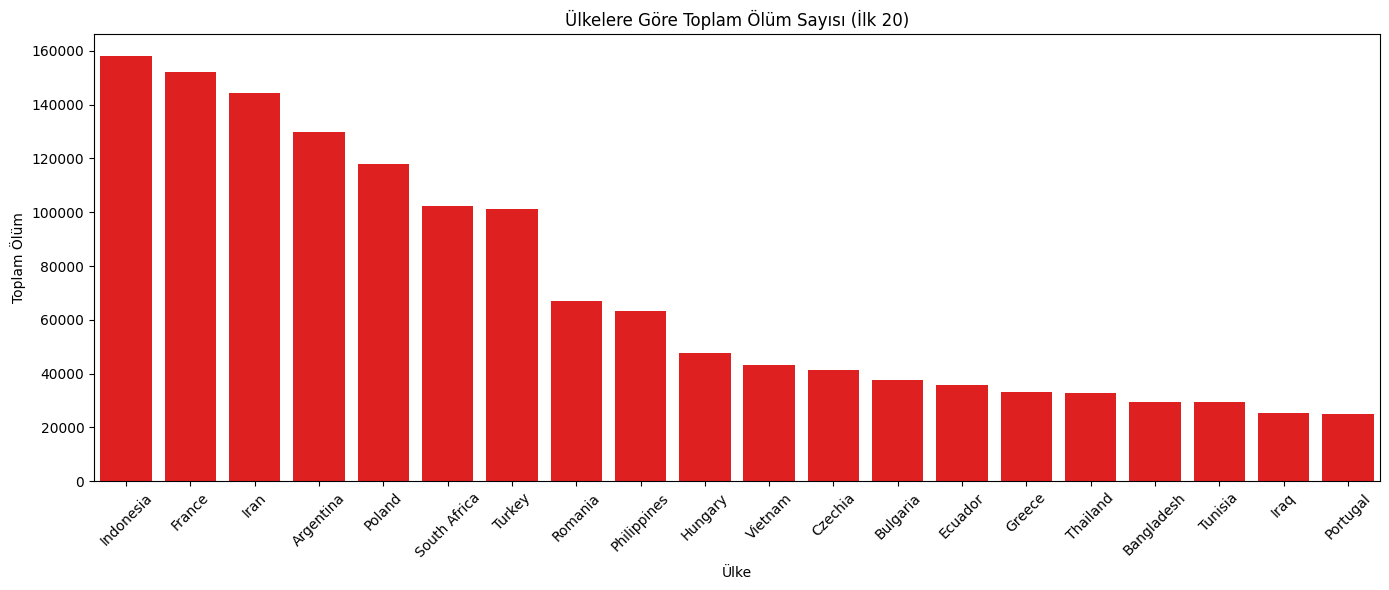

In [48]:
# Ülkeye göre toplam ölüm sayısı
death_by_country = data.groupby("Country_Region")["Deaths"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=death_by_country.index, y=death_by_country.values, color="Red" )
plt.xticks(rotation=45)
plt.title("Ülkelere Göre Toplam Ölüm Sayısı (İlk 20)")
plt.xlabel("Ülke")
plt.ylabel("Toplam Ölüm")
plt.tight_layout()
plt.show()


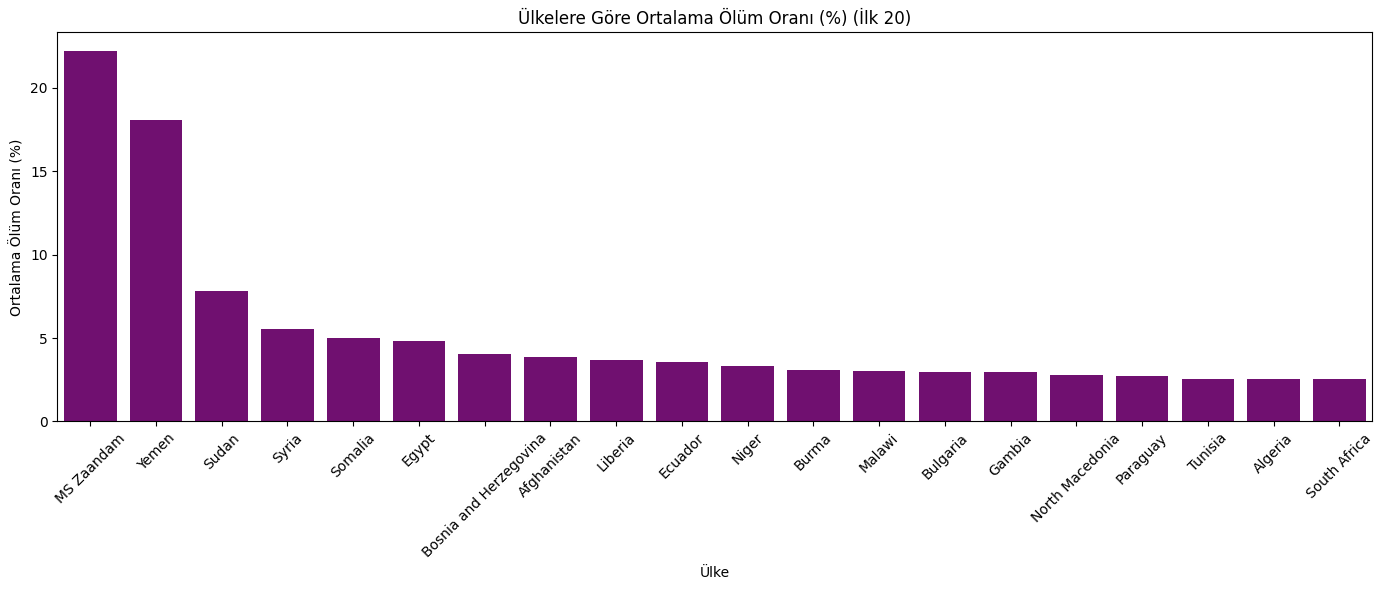

In [50]:
# Ölüm oranına göre ilk 20 ülke
fatality_ratio = data.groupby("Country_Region")["Case_Fatality_Ratio"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=fatality_ratio.index, y=fatality_ratio.values, color="Purple")
plt.xticks(rotation=45)
plt.title("Ülkelere Göre Ortalama Ölüm Oranı (%) (İlk 20)")
plt.xlabel("Ülke")
plt.ylabel("Ortalama Ölüm Oranı (%)")
plt.tight_layout()
plt.show()


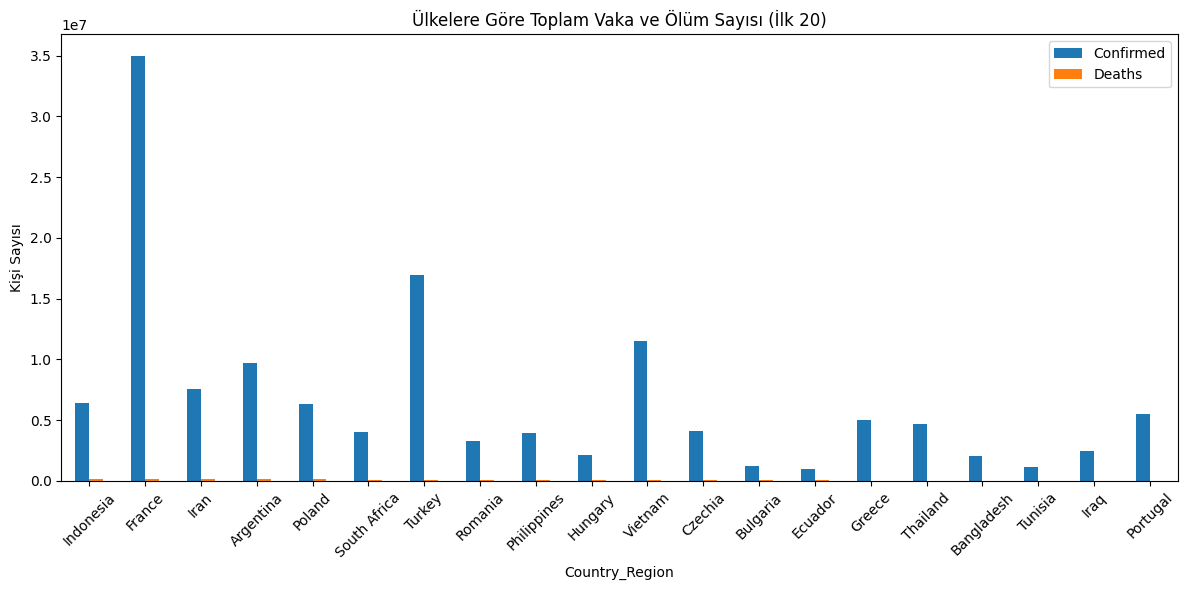

In [51]:
summary = data.dropna(subset=["Country_Region"])  # sadece dolu veriler

top_deaths = summary.groupby("Country_Region")[["Confirmed", "Deaths"]].sum().sort_values(by="Deaths", ascending=False).head(20)

top_deaths.plot(kind="bar", figsize=(12, 6))
plt.title("Ülkelere Göre Toplam Vaka ve Ölüm Sayısı (İlk 20)")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


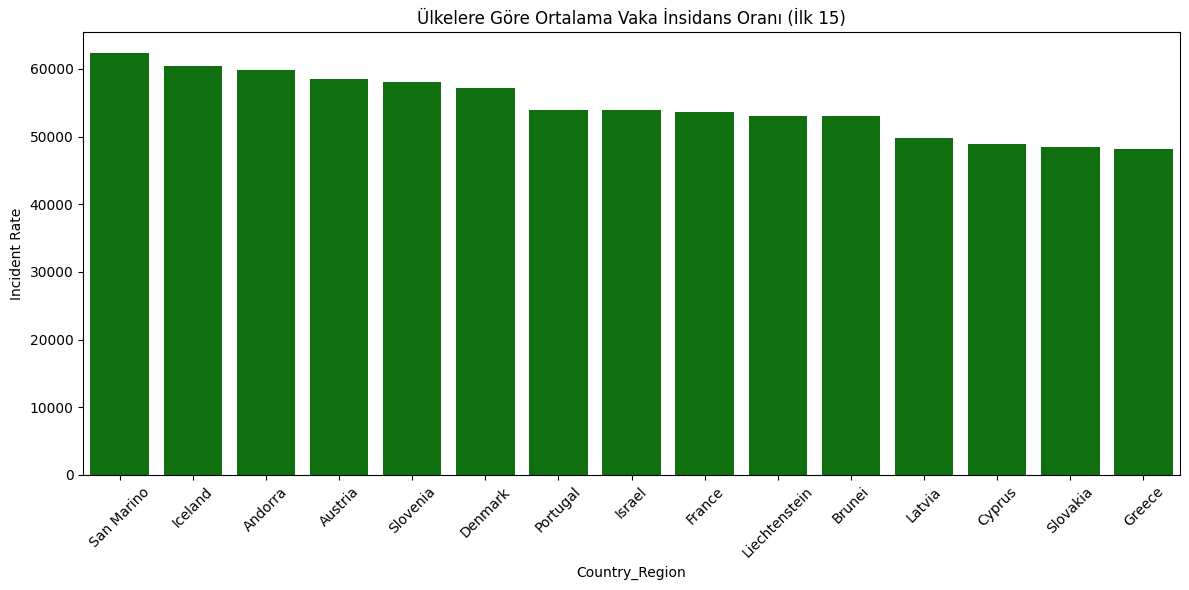

In [53]:
top_incident = summary.groupby("Country_Region")["Incident_Rate"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_incident.index, y=top_incident.values, color="Green")
plt.xticks(rotation=45)
plt.title("Ülkelere Göre Ortalama Vaka İnsidans Oranı (İlk 15)")
plt.ylabel("Incident Rate")
plt.tight_layout()
plt.show()


In [34]:
summary.describe().T[["mean", "50%", "std", "min", "max"]].rename(columns={"50%": "median"})


,mean,median,std,min,max
Last_Update,2022-10-12 04:22:51.000000512,2022-10-12 04:22:51,NaN,2022-10-12 04:22:51,2022-10-12 04:22:51
Confirmed,1219466.909605,206250.0,3335249.127032,9.0,34986866.0
Deaths,11770.627119,2158.0,26783.766273,0.0,158235.0
Incident_Rate,15027.69293,8085.478274,17541.139107,38.894293,62272.379044
Case_Fatality_Ratio,1.52085,1.073566,2.308684,0.0,22.222222


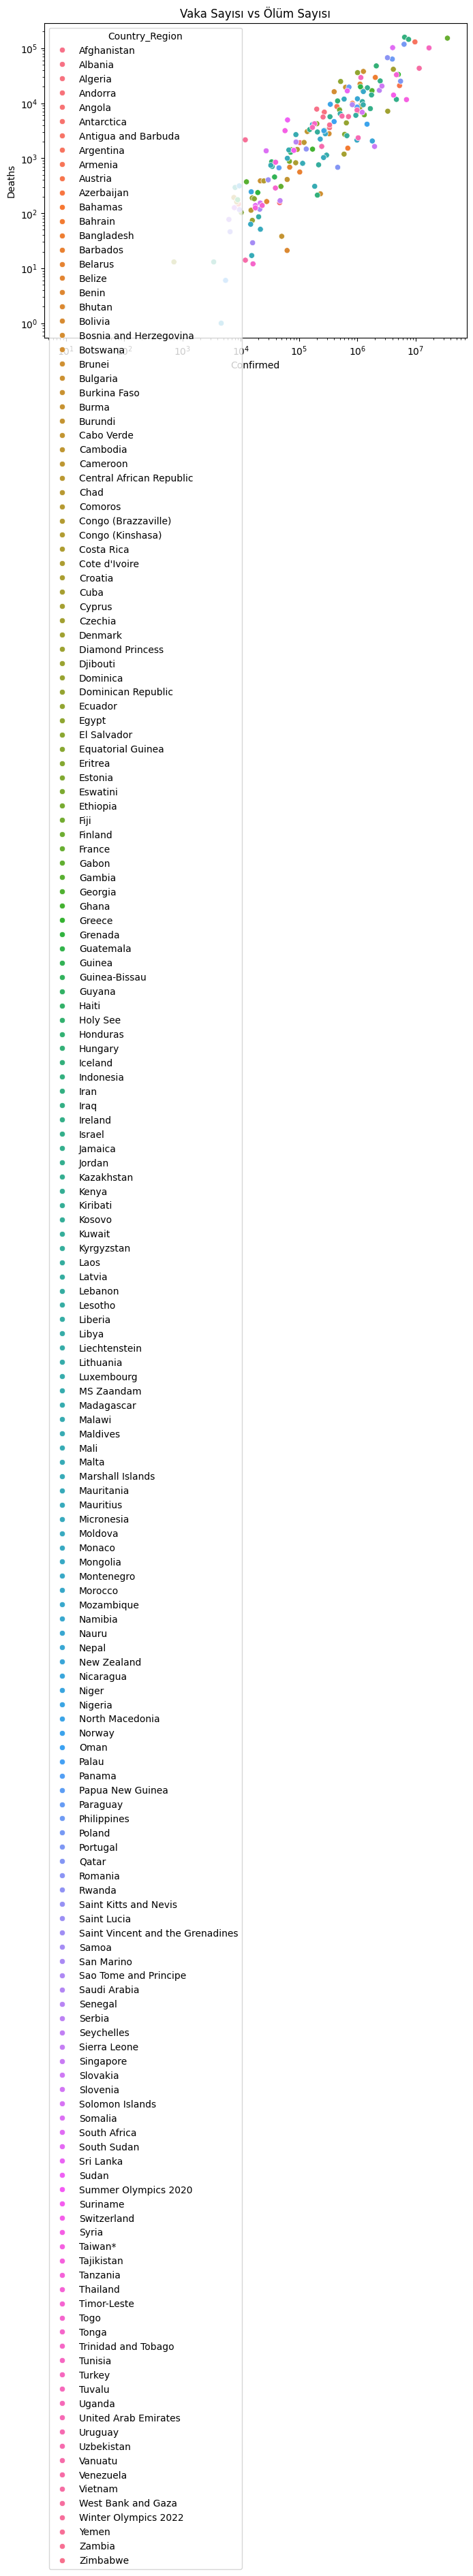

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=summary, x="Confirmed", y="Deaths", hue="Country_Region")
plt.title("Vaka Sayısı vs Ölüm Sayısı")
plt.xscale("log")
plt.yscale("log")
plt.show()


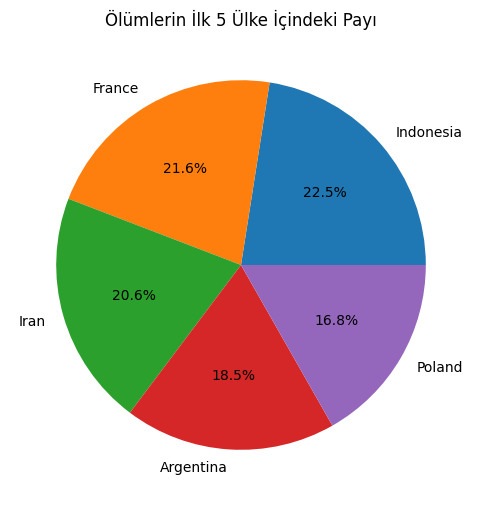

In [38]:
top5_deaths = summary.groupby("Country_Region")["Deaths"].sum().sort_values(ascending=False).head(5)
top5_deaths.plot(kind="pie", autopct='%1.1f%%', figsize=(6,6), title="Ölümlerin İlk 5 Ülke İçindeki Payı")
plt.ylabel("")
plt.show()


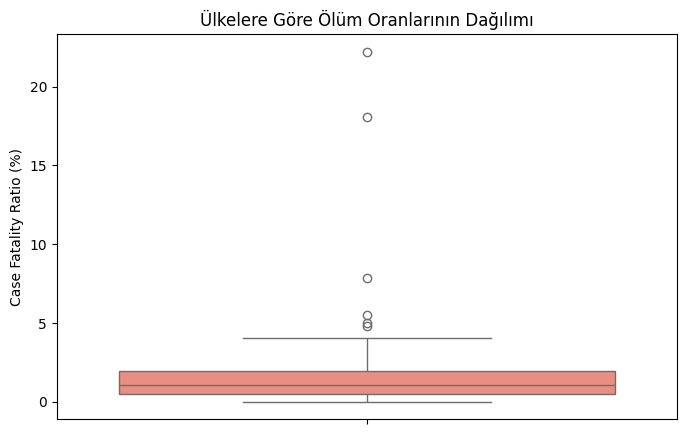

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=summary, y="Case_Fatality_Ratio", color="salmon")
plt.title("Ülkelere Göre Ölüm Oranlarının Dağılımı")
plt.ylabel("Case Fatality Ratio (%)")
plt.show()


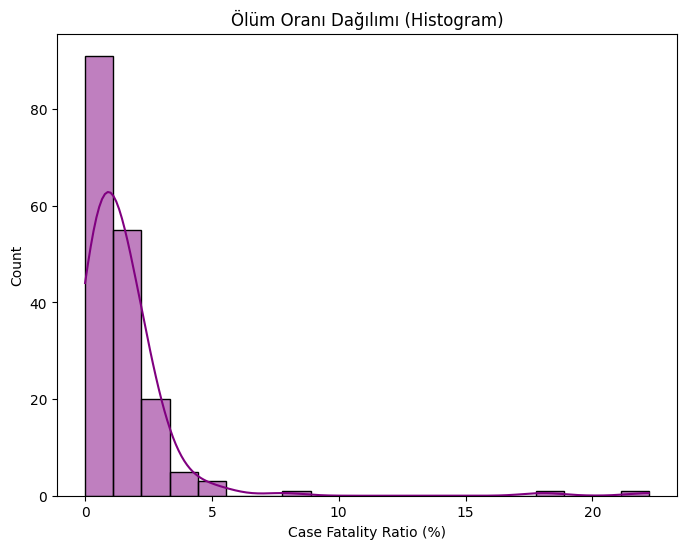

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(data=summary, x="Case_Fatality_Ratio", bins=20, kde=True, color="purple")
plt.title("Ölüm Oranı Dağılımı (Histogram)")
plt.xlabel("Case Fatality Ratio (%)")
plt.show()


In [42]:
top10_cfr = summary[["Country_Region", "Confirmed", "Deaths", "Case_Fatality_Ratio"]].dropna().sort_values(by="Case_Fatality_Ratio", ascending=False).head(10)
print(top10_cfr)


              Country_Region  Confirmed   Deaths  Case_Fatality_Ratio
381               MS Zaandam        9.0      2.0            22.222222
4013                   Yemen    11939.0   2158.0            18.075216
641                    Sudan    63344.0   4962.0             7.833418
666                    Syria    57326.0   3163.0             5.517566
617                  Somalia    27223.0   1361.0             4.999449
197                    Egypt   515645.0  24797.0             4.808929
40    Bosnia and Herzegovina   399227.0  16155.0             4.046570
0                Afghanistan   200626.0   7807.0             3.891320
376                  Liberia     7985.0    294.0             3.681904
196                  Ecuador  1006070.0  35900.0             3.568340
